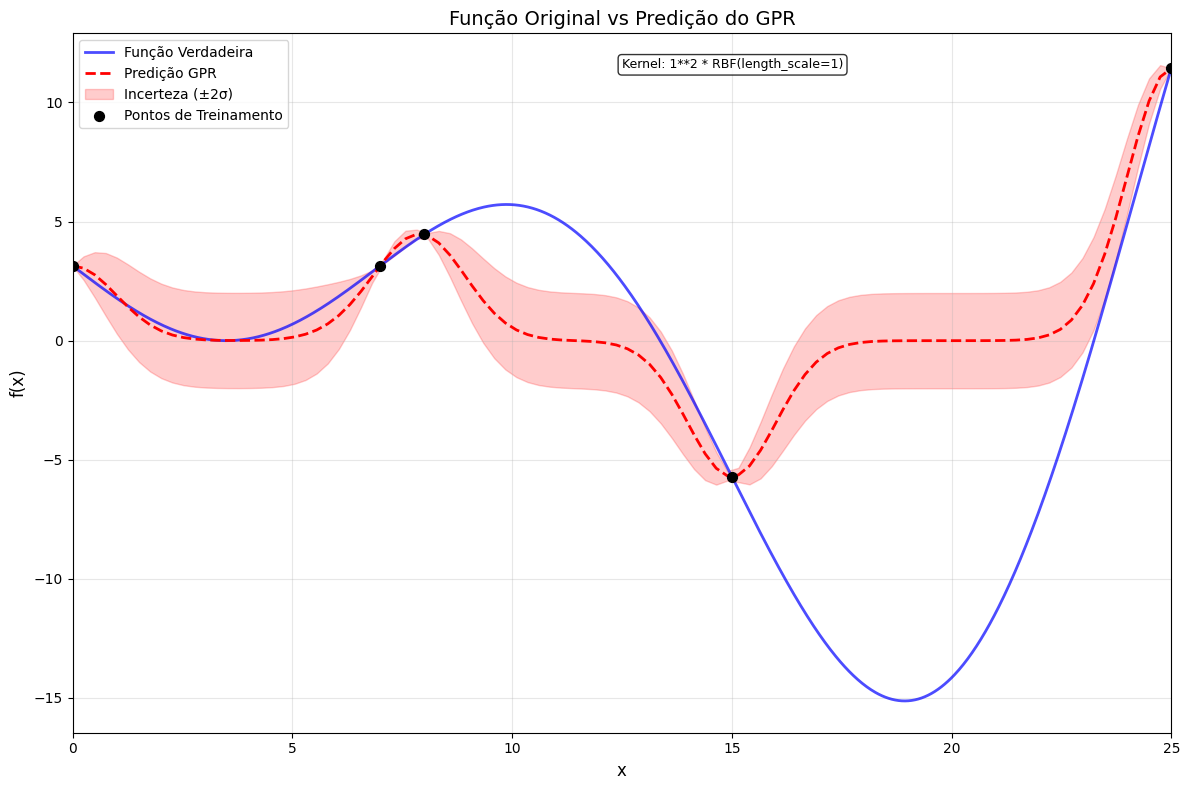

Número de pontos de treinamento: 5
Kernel otimizado: 1**2 * RBF(length_scale=1)
Log-marginal-likelihood: -100.96


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Definindo a função
def active_learning_example(x: list) -> float:
    """
    Active learning function.

    :param x: Design variables

    :return: Objective function value
    """
    of = (x[0] - 3.5) * np.sin((x[0] - 3.5) / (np.pi))
    return of

# Criando pontos para o gráfico da função original
x_plot = np.linspace(0, 25, 1000).reshape(-1, 1)
y_true = np.array([active_learning_example([xi]) for xi in x_plot.flatten()])

# Gerando alguns pontos de treinamento (amostras iniciais)
x_train = np.array([[0.0], [7.0], [8.0], [15.0], [25.0]])
y_train = np.array([active_learning_example([xi]) for xi in x_train.flatten()])

# Criando e treinando o GPR
# kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
# gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gpr = GaussianProcessRegressor()
gpr.fit(x_train, y_train)

# Fazendo a predição com GPR para 100 pontos
x_pred = np.linspace(0, 25, 100).reshape(-1, 1)
y_pred, sigma = gpr.predict(x_pred, return_std=True)

# Criando o gráfico
plt.figure(figsize=(12, 8))

# Plotando a função verdadeira
plt.plot(x_plot, y_true, 'b-', linewidth=2, label='Função Verdadeira', alpha=0.7)

# Plotando a predição do GPR
plt.plot(x_pred, y_pred, 'r--', linewidth=2, label='Predição GPR')

# Plotando a incerteza (2 desvios padrão)
plt.fill_between(x_pred.flatten(), 
                 y_pred - 2*sigma, 
                 y_pred + 2*sigma, 
                 alpha=0.2, 
                 color='red', 
                 label='Incerteza (±2σ)')

# Plotando os pontos de treinamento
plt.scatter(x_train, y_train, c='black', s=50, zorder=5, label='Pontos de Treinamento')

# Configurações do gráfico
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.title('Função Original vs Predição do GPR', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xlim(0, 25)

# Adicionando informações sobre o modelo
plt.text(0.5, 0.95, f'Kernel: {gpr.kernel_}', 
         transform=plt.gca().transAxes, fontsize=9, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()

# Printando algumas informações
print(f"Número de pontos de treinamento: {len(x_train)}")
print(f"Kernel otimizado: {gpr.kernel_}")
print(f"Log-marginal-likelihood: {gpr.log_marginal_likelihood():.2f}")